to do:
-run more models through Cheyenne
-create script to filter through runs of model to find ARs which bound Greenland
-get AR dates from this filter
-get precip data pre-/post-dating these dates
-write code for SMB anomaly calc
    -normalize SMB across selves to compare SMB/AR events across basins
-write code for corr coeff

# **Surface mass balance changes in Greenland due to atmospheric rivers**

## Data description

#Greenland climatology data, some published paper
#SMB history as well

### SMB data:

### AR selection:

### Precipitation data:

#### Map of precipitation gauges and basins:

In [ ]:
# map

|Site Name|Region|Latitude|Longitude|
|------|------|------|------|
|Danmarkshavn |NE  |76.7694  | -18.6681 |
|Ittoqqortoormiit  |NE  |70.4844  | -21.9511 |
|Pituffik  |NW  |76.5333| -68.75 |
|Tasiilaq  |SE  |65.6111  | -37.6367 |
|Ikerasassuaq  |SE  |60.0553  | -43.1653 |
|Qaqortoq  |SW  |60.7156  | -46.0489 |
|Nuuk  |SW  |64.1833  | -51.7308 |
|Sisimiut  |SW  |66.9167  | -53.6667 |
|Mitt. Kangerlussuaq   |SW  |67.01667  | -50.7 |
|Paamiut Heliport  |SW  |62  | -49.6667 |
|Mitt. Narsarsuaq  |SW  |61.1667  | -45.4167 |
|Aasiaat  |CW  |68.7081  | -52.8517 |


Table 1. Table describing precipitation stations on GrIS. Due to the fact that only 5/7 basins have precipitation gauges from DMI, only these were included in the study. SMB plots were created for all zones, but only those with precipitation gauges were analyzed statistically.

## Methodology

### Data aquisition: 

#### AR event selection:

ARs modeled by Adam Herrington were used in AR event selection. The modeled ARs were selected from data ranging from 1986-2021. Before final selection of ARs, each run of the model was remapped to a structured grid. Previously the models existed on an unstructured grid, meaning there was no meaningful visual geographic connection to each AR.  In order to choose visualize the ARs and choose those which exist over the GrIS, a script was created to select ARs over this area.

In [1]:
# No script was actually written, more so just chosen preliminarily using ncview
# and then checked using script. Perhaps attach an image of ncview setup later
# on here.


Additionally, a script was also written to visualize ARs and to ensure those that were filtered by the selection script are those which exist near the GrIS.

In [2]:
# Visualization script
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
#%% File load in and variable creation

# Enter path to desired file
path = '/Users/alpac/Documents/TempestExtremes/AR_GrIS/'
nc_file1 = 'cam6_2_022.se_FHIST_ne30pg3_ne30pg3_mg17_1800pes_200507_mg3-Nx5yrs.cam.h3.1991-08-29-00000.ARtag_remapped.nc'
nc_file2 = 'cam6_2_022.se_FHIST_ne30pg3_ne30pg3_mg17_1800pes_200507_mg3-Nx5yrs.cam.h3.1992-08-24-00000.ARtag_remapped.nc'
nc_file3 = 'cam6_2_022.se_FHIST_ne30pg3_ne30pg3_mg17_1800pes_200507_mg3-Nx5yrs.cam.h3.1993-08-19-00000.ARtag_remapped.nc'
nc_file1 = 'cam6_2_022.se_FHIST_ne30pg3_ne30pg3_mg17_1800pes_200507_mg3-Nx5yrs.cam.h3.1995-08-09-00000.ARtag_remapped.nc'
nc_file2 = 'cam6_2_022.se_FHIST_ne30pg3_ne30pg3_mg17_1800pes_200507_mg3-Nx5yrs.cam.h3.1998-08-24-00000.ARtag_remapped.nc'

# Create a netcdf4 variable from this file
# Change nc_file# to view different viles
fh = Dataset(path+nc_file1,mode='r')

#%%
# Create viarbles within python which are extracted from netcdf4 file
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
time = fh.variables['time'][:].astype('int')
artag = fh.variables['AR_binary_tag'][:]

#%% Plotting

i = 0

# Specify grid parameters

mp = Basemap(projection = 'cyl',
             llcrnrlon = -0,
             llcrnrlat = -90,
             urcrnrlon = 360,
             urcrnrlat = 90,
             resolution = 'i')

# Create grid based off of lat/long variables from matrices
lon, lat = np.meshgrid(lons,lats)

# Create x,y variables based on mat
x,y = mp(lon,lat)

cs = mp.pcolor(x,y,np.squeeze(artag[3]), cmap = 'Reds')

# Add Coastlines, States, and Country Boundaries
mp.drawcoastlines()
#mp.drawstates()
#mp.drawcountries()

plt.plot()

##### Importation of necessary libraries:

In [5]:
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import datetime
from datetime import timedelta
import numpy as np
from pathlib import Path

Finally, six ARs were chosen to be used in this study: three which occurred in the Northern Hempishere summer season and three in the Northern Hempisphere winter season.

In [2]:
AR_dates = ['1992-9-17','1995-08-12','1996-08-29','1997-9-17','1998-8-24']

study_interval = timedelta(days=30)

start_study = pd.to_datetime(AR_dates[0])-study_interval
AR_date = pd.to_datetime(AR_dates[0])
end_study = pd.to_datetime(AR_dates[0])+study_interval

#### Precipitation data:

Using the dates previously chosen, data was collected from the Danish Metereological Institute (DMI). Locations with precipitation data from DMI include Danmarkshavn (NE), Daneborg (NE), Ittoqqortoormiit (NE), Angissoq (SE), 
Ikerasassuaq (SE), Tasiilaq (SE), Qaqortoq (SW), Nuuk (SW), Aasiaat (SW), #Keep working on getting the correct stations --> basins. Maybe put into a table? This probably belongs in data description section#  Time series data pre-dating and post-dating the date of AR occurence by 3 months was downloaded as a CSV.

In [3]:
# Include figure from DMI download page

This data was then read into a dataframe. To include all precipitation data from the same location, precipitation measurements within the same region (i.e., NW, CE, etc.) were added together.

In [ ]:
# Script showing precip data read in and summing of different regions

#%% Importing precip data

# Path to precip files
data_folder = str(Path("GrIS_precip_data/"))

# Station ID #s
stations = ['04320','04339','04360','04390','04272','04250','04220','04202','04230','04231','04260',
            '04270']

# Dataframe which connects stations to specified region
dfcon_stn_reg = {'stationID' : ['04320','04339','04360','04390','04272','04250','04220','04202','04230','04231','04260',
            '04270'], 'region' : ['NE','NE','SE','SE','SW','SW','CW', 'NW','SW','SW','SW','SW'], 'name':['Danmarkshavn',
            'Ittoqqortoormiit','Tasiilaq','Ikerasassuaq','Qaqortoq', 'Nuuk','Aasiaat','Pituffik','Sisimut','Mitt. Kangerlussuaq',
             'Paamiut Heliport','Mitt. Narsarsuaq']}
# Convert to dataframe
dfcon_stn_reg = pd.DataFrame(dfcon_stn_reg)

# Add all stations to a dataframe list
dataframe_list = [pd.read_csv(data_folder + '/' + file+'.txt',delim_whitespace=True) for file in stations]

# Try to convert each piece of data in dataframes to a float object.
# If it fails, remove dataframe rows which can't be converted to 
# floats (they are strings) and convert the precip column to numeric.
for df in dataframe_list:
    for index,row in df.iterrows():
        try:
            row = row.astype(str).astype(float)
        except:
            df.drop([index], axis = 0, inplace = True)
            df['rrr6'] = pd.to_numeric(df['rrr6'])

# Processing dataframes
for df in dataframe_list:
    df['minutes']=0 # Add in minutes column
    df['seconds']=0 # Add in seconds column
    # Create a datetime string holding all datetime information
    df['Datetime'] = df[['year','month','day']].astype(str).apply('-'.join,1)+' '+df[['hour','seconds','minutes']].astype(str).apply(':'.join,1)
    # Change datetime column into a true pandas datetime object
    df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce', format='%Y-%m-%d %H:%M:%S')
    # Set datetime as index
    df.set_index('Datetime', inplace = True)
    # Drop unnecessary columns
    df.drop(columns={'stat_no','year', 'month', 'day','hour','dd','ff','n','pppp','ttt','txtxtx','tntntn','rh','sss','minutes','seconds'}, inplace = True)
    df.fillna(0, inplace = True) # Assume that there was no precipitation where nan
    df.rename(columns={'rrr6':"precip_mm"}, inplace = True) # Rename column
    df.replace(-1,0,inplace=True) #-1 indicates less than 1 mm of precip but greater than 0, set to 0

#%% Precip data preparation

# Copy dataframe_list into a seperate dataframe to avoid re-running above cell > long processing time
dataframe_list2 = dataframe_list.copy()

i = 0
while i < 12:
    # Resample all dataframes to daily data
    dataframe_list2[i] = dataframe_list2[i].resample('D').sum()
    # Trim study sites to start/end study
    dataframe_list2[i].drop(dataframe_list2[i].loc[:start_study].index,axis=0,inplace = True)
    dataframe_list2[i].drop(dataframe_list2[i].loc[end_study:].index,axis=0,inplace = True)
    i = i + 1 # Increment counter 

# Divide dataframes into seperate based on study station
df04320_NE = dataframe_list2[0]
df04339_NE = dataframe_list2[1]
df04360_SE = dataframe_list2[2]
df04390_SE = dataframe_list2[3]
df04220_CW = dataframe_list2[6]
df04202_NW = dataframe_list2[7]
df04230_SW = dataframe_list2[8]
df04231_SW = dataframe_list2[9]
df04260_SW = dataframe_list2[10]
df04270_SW = dataframe_list2[11]
df04272_SW = dataframe_list2[4]
df04250_SW = dataframe_list2[5]

# Add all precip for time periods for each individual basin and average by number gauges
dfprecip_NE = (df04320_NE + df04339_NE)/2

dfprecip_SE = (df04360_SE + df04390_SE)/2

dfprecip_CW = df04220_CW/1

dfprecip_NW = df04202_NW/1

dfprecip_SW = (df04230_SW + df04231_SW + df04260_SW + df04270_SW + df04272_SW + df04250_SW)/6

# Use trimmed precip data to find normalized average across study period

# Multiindex dataframe holding each basin
dfprecip_tot= pd.concat({'dfprecip_NE':dfprecip_NE, 'dfprecip_SE':dfprecip_SE, 'dfprecip_CW':dfprecip_CW,
                         'dfprecip_NW':dfprecip_NW, 'dfprecip_SW':dfprecip_SW}, axis=1)

# Holds avg precip values for each of the basins
dfprecip_avg = dfprecip_tot.mean()
dfprecip_avg = dfprecip_avg.droplevel(level=1)

dfprecip_tot = dfprecip_tot.unstack().droplevel(level=1)

# Event precipitation
study_interval = timedelta(days=3) # Question: How much precip can be attributed to ARs?

# Event start/stop dates
event_start = pd.to_datetime(AR_dates[0])-study_interval
event_end = pd.to_datetime(AR_dates[0])+study_interval

# Take the precip within the event interval
dfprecip_event = dfprecip_tot.loc[(slice(None),slice(event_start,event_end))]
dfprecip_event = dfprecip_event.unstack()

# Sum to get total event precipitation
dfprecip_event = dfprecip_event.sum(axis=1)

C:\Users\alpac\AppData\Local\Temp/ipykernel_7196/3315207097.py:21: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  dataframe_list = [pd.read_csv(data_folder + '/' + file+'.txt',delim_whitespace=True) for file in stations]


#### SMB data:

##### Data input and cleaning:

SMB data was downloaded from Mankoff et al., 2021a. This data was originally in the form of a netCDF so it was first converted into a dataframe. After importation was complete, the dataframe was trimmed to the relevant time period and stripped of unnecessary columns.

In [ ]:
# Open netCDF file and convert to dataframe
open_netcdf = xr.open_dataset('MB_region.nc') # Netcdf from Mankoff, et al., 2021
SMB_data = open_netcdf.to_dataframe()

#Drop unnecessary rows from df
SMB_data = SMB_data.drop(columns={'MB', 'MB_err', 'MB_ROI', 'MB_ROI_err',
                          'D','BMB'})
SMB_data = SMB_data.drop(columns={'D_ROI', 'D_ROI_err', 'BMB_err', 'BMB_ROI', 'BMB_ROI_err',
                          'MB_HIRHAM', 'MB_MAR', 'MB_RACMO', 'D_err'})
start_date = pd.to_datetime('1986-1-1')

SMB_data = SMB_data[start_date:]
#%% Divide regional SMB into seperate dataframes

regions = ['NO','SE','SW','NE','NW','CE','CW']


# Create an empty dict to put created dataframes in
d = {} 

# Iterate through regions, selecting SMB data from each
for i in regions:
    data = SMB_data.loc[(slice(None),i),'SMB_ROI'] # Select SMB data for each region and store in data
    d[i] = pd.DataFrame(data=data) # Add this data to the dict, d

# Create unique dataframes storing individual dict dataframes for reach region
# Drop second index (regions) once there are individual names for each regional SMB
smb_NO = d["NO"].droplevel(level=1)
smb_SE = d["SE"].droplevel(level=1)
smb_SW = d["SW"].droplevel(level=1)
smb_NE = d["NE"].droplevel(level=1)
smb_NW = d["NW"].droplevel(level=1)
smb_CE = d["CE"].droplevel(level=1)
smb_CW = d["CW"].droplevel(level=1) 

data = [smb_NO["SMB_ROI"], smb_SE["SMB_ROI"],smb_SW["SMB_ROI"],smb_NE["SMB_ROI"],smb_NW["SMB_ROI"],
        smb_CE["SMB_ROI"],smb_CW["SMB_ROI"]]

# Create a dataframe holding all SMB data with regions as keys
smb_TOT = pd.concat(data, axis=1, keys=regions)

### SMB anomaly calculation:

SMB were compared using a SMB anomaly (SMBa) calculation using:
> $n_{i} = ( SMB_{i}-SMB_{ave} )$ &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; eq. 1

where $n_{i}$ is the calculated SMB anomaly, $SMB_{i}$ is the normalized SMB of the study day, and $SMB_{ave}$ is the average normalized SMB of the time included in each range (i.e., the 3 months preceding and following the day of AR landfall). This equation was adapted from the melt anomaly equation used in Huss et al., 2009. 

In [ ]:
#%% SMB anomaly calculation

# Copy of data_reg to allow for manipulation
data_reg2 = data_reg.copy()

# Trim SMB to fit study period
i = 0
while i < 7: # 7 because there are 7 entries in data_reg (7 basins)
    data_reg2[i].drop(data_reg2[i].loc[:start_study].index,axis=0,inplace = True)
    data_reg2[i].drop(data_reg2[i].loc[end_study:].index,axis=0,inplace = True)
    i = i+1
    
# Create seperate dataframes holding SMB info for each region
dfSMB_NE = data_reg2[3]
dfSMB_SE = data_reg2[1]
dfSMB_CW = data_reg2[6]
dfSMB_NW = data_reg2[4]
dfSMB_SW = data_reg2[2]

# Create multi-index dataframe holding each individual basin SMB difference data
dfSMB_tot= pd.concat({'dfSMB_NE':dfSMB_NE['diff_SMB'], 'dfSMB_SE':dfSMB_SE['diff_SMB'], 'dfSMB_CW':dfSMB_CW['diff_SMB'],
                         'dfSMB_NW':dfSMB_NW['diff_SMB'], 'dfSMB_SW':dfSMB_SW['diff_SMB']}, axis=1)


# Find average of each SMB difference
dfSMB_avg = dfSMB_tot.mean()

# Calculate SMB anomaly
    # Normalized SMB change on day of AR ('diff_SMB' in data reg)
    # Normalized average change in SMB across total span

# Anomaly = SMB(difference) on study date - SMB(difference) average for study period
dfSMB_anom = dfSMB_tot.unstack().loc[(slice(None),AR_date)] - dfSMB_avg

x = dfSMB_tot.unstack()

# Make iterative for each of study dates

### Correlation coefficient between high precip and low SMB

To understand the relationship between high precipitation events during ARs, correlation coefficients of the precipitation values and SMB were calculated using Pearson's correlation coefficient:
> $r= \frac{\sum ((P_{i} - P_{ave})(SMB_{i} - SMB_{ave}))}{\sqrt{\sum(P_{i} - P_{ave})^2 \sum(SMB_{i} - SMB_{ave})^2}}$

where $r$ represents the correlation coefficient, $SMB_{i}$ represents the SMB change of the study period, $SMB_{ave}$ represents the mean SMB change of the study period, $P_{i}$ represents the precipitation values of the study period, and $P_{ave}$ represents the mean precipitation of this study period.

> maybe use SMB anomaly instead


In [ ]:
# Code including corr coeff calculation
SMB_list = ['dfSMB_NE','dfSMB_SE','dfSMB_CW','dfSMB_NW','dfSMB_SW']

SMB_corr_coeff = pd.DataFrame(index = SMB_list, columns = ['AR1'])

# Individual basin (event precip) --> Use this one for actual analysis
# Try to run the Pearson corr coeff equation. If it runs, add the corr coeff to the 
# SMB_corr_coeff dataframe and print the corr_coeff. If it doesn't run (has an error due to)
# lack of precipitation in a time period, don't add anything to SMB_corr_coeff and print flag.
i=0
while i < 5:
    try:
        corr_coeff = np.sum((dfprecip_event[i] - dfprecip_avg[i])*
                            ((dfSMB_tot.unstack().loc[(SMB_list[i],AR_date)] - dfSMB_avg[i])))/np.sqrt(
                                np.sum((dfprecip_event[i] - dfprecip_avg[i])**2)*
                                np.sum((dfSMB_tot.unstack().loc[(SMB_list[i],AR_date)] - dfSMB_avg[i])**2))
        SMB_corr_coeff.iloc[i] = corr_coeff
        print(corr_coeff)
    except:
        print("No precipitation during this period in " + SMB_list[i])
    i = i+1
print(SMB_coff_coeff)

## Results

SMB for the whole span of data was plotted for visual comparison.

[]

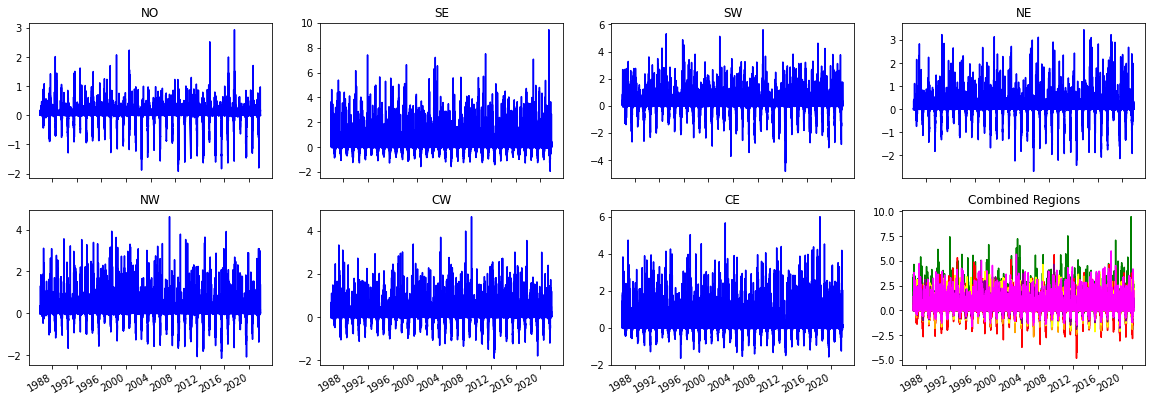

In [10]:
fig, axes = plt.subplots(2,4,sharex = True)

fig.set_size_inches(20, 7, forward=True) # Setting individual size

#axes.set_xlim(left = start, right = end) # Trimming x limits to each individual start and end

# Plotting necessary data
    
axes[0,0].plot(smb_TOT['NO'], color = 'blue', linestyle = '-', label = 'NO')
axes[0,0].set_title('NO')
     
axes[0,1].plot(smb_TOT['SE'], color = 'blue', linestyle = '-', label = 'SE')
axes[0,1].set_title('SE')

axes[0,2].plot(smb_TOT['SW'], color = 'blue', linestyle = '-', label = 'SW')
axes[0,2].set_title('SW')

axes[0,3].plot(smb_TOT['NE'], color = 'blue', linestyle = '-', label = 'NE')
axes[0,3].set_title('NE')

axes[1,0].plot(smb_TOT['NW'], color = 'blue', linestyle = '-', label = 'NW')
axes[1,0].set_title('NW')

axes[1,1].plot(smb_TOT['CW'], color = 'blue', linestyle = '-', label = 'CW')
axes[1,1].set_title('CW')

axes[1,2].plot(smb_TOT['CE'], color = 'blue', linestyle = '-', label = 'CE')
axes[1,2].set_title('CE')

# Combined plot

axes[1,3].plot(smb_TOT['NO'], color = 'blue', linestyle = '-', label = 'NO')
axes[1,3].set_title('Combined Regions')

axes[1,3].plot(smb_TOT['SE'], color = 'green', linestyle = '-', label = 'SE')
axes[1,3].set_title('Combined Regions')

axes[1,3].plot(smb_TOT['SW'], color = 'red', linestyle = '-', label = 'SW')
axes[1,3].set_title('Combined Regions')

axes[1,3].plot(smb_TOT['NE'], color = 'orange', linestyle = '-', label = 'NE')
axes[1,3].set_title('Combined Regions')

axes[1,3].plot(smb_TOT['NW'], color = 'yellow', linestyle = '-', label = 'NW')
axes[1,3].set_title('Combined Regions')

axes[1,3].plot(smb_TOT['CW'], color = 'purple', linestyle = '-', label = 'CW')
axes[1,3].set_title('Combined Regions')

axes[1,3].plot(smb_TOT['CE'], color = 'fuchsia', linestyle = '-', label = 'CE')
axes[1,3].set_title('Combined Regions')

fig.autofmt_xdate()

plt.plot()

SMB and precip over each study period were plotted for visual comparison.

In [ ]:
#%% Plot precip/SMB over AR time periods

fig, axes = plt.subplots(2,3,sharex = True)

fig.set_size_inches(20, 10, forward=True) # Setting individual size

fig.suptitle("Relationship between change in SMB and precipitation", fontsize=20)

#fig.tight_layout(0.1)
plt.subplots_adjust(hspace = 0.1, wspace = 0.3)

axes[0,0].plot(dfprecip_NE, color = 'blue', linestyle = '-', label = 'NE')
axes2=axes[0,0].twinx()
axes[0,0].set_title('NE')
axes2.plot(dfSMB_NE['diff_SMB'], color = 'red', linestyle = '-', label = 'NE')
plt.axvline(x=AR_date, color = 'green')
axes[0,0].set_ylabel("Precipitation (mm)",fontsize=10, color = 'blue')
axes2.set_ylabel("Change in SMB (Gt/yr)",fontsize=10, color = 'red')

axes[0,1].plot(dfprecip_SE, color = 'blue', linestyle = '-', label = 'SE')
axes2=axes[0,1].twinx()
axes[0,1].set_title('SE')
axes2.plot(dfSMB_SE['diff_SMB'], color = 'red', linestyle = '-', label = 'SE')
plt.axvline(x=AR_date, color = 'green')
axes[0,1].set_ylabel("Precipitation (mm)",fontsize=10, color = 'blue')
axes2.set_ylabel("Change in SMB (Gt/yr)",fontsize=10, color = 'red')

axes[0,2].plot(dfprecip_CW, color = 'blue', linestyle = '-', label = 'CW')
axes2=axes[0,2].twinx()
axes[0,2].set_title('CW')
axes2.plot(dfSMB_CW['diff_SMB'], color = 'red', linestyle = '-', label = 'CW')
plt.axvline(x=AR_date, color = 'green')
axes[0,2].set_ylabel("Precipitation (mm)",fontsize=10, color = 'blue')
axes2.set_ylabel("Change in SMB (Gt/yr)",fontsize=10, color = 'red')

axes[1,0].plot(dfprecip_NW, color = 'blue', linestyle = '-', label = 'NW')
axes2=axes[1,0].twinx()
axes[1,0].set_title('NW')
axes2.plot(dfSMB_NW['diff_SMB'], color = 'red', linestyle = '-', label = 'NW')
plt.axvline(x=AR_date, color = 'green')
axes[1,0].set_ylabel("Precipitation (mm)",fontsize=10, color = 'blue')
axes2.set_ylabel("Change in SMB (Gt/yr)",fontsize=10, color = 'red')

axes[1,1].plot(dfprecip_SW, color = 'blue', linestyle = '-', label = 'SW')
axes2=axes[1,1].twinx()
axes[1,1].set_title('SW')
axes2.plot(dfSMB_SW['diff_SMB'], color = 'red', linestyle = '-', label = 'SW')
plt.axvline(x=AR_date, color = 'green')
axes[1,1].set_ylabel("Precipitation (mm)",fontsize=10, color = 'blue')
axes2.set_ylabel("Change in SMB (Gt/yr)",fontsize=10, color = 'red')

fig.autofmt_xdate()

plt.show()

# Fix formatting on labels
# Add something to indicate that green line is AR date
# Get rid of last plot